In [20]:
####Change working directory

%cd "C:\Users\Localadmin\OneDrive - University of New Hampshire\Practicum\Freshair"

C:\Users\Localadmin\OneDrive - University of New Hampshire\Practicum\Freshair


In [17]:
# pip install xgboost

In [ ]:
# pip uninstall umap

In [2]:
# pip install umap-learn

In [21]:
####Import dependencies


import pandas as pd
import numpy as np
import random
import scipy as sp
import os

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.decomposition import SparsePCA

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import umap.umap_

from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

import pickle

In [66]:
#read the file

Test = pd.read_csv("anomlies-1910-testdf.csv")
Train = pd.read_csv("master_df_2_20_2020.csv")
print(Test.shape)
print(Train.shape)


(13362, 238)
(8373, 238)


In [67]:
####head

Test = Test[Test.y != 'inconclusive'] #drop inconclusives
pd.set_option('display.max_columns',None)
Test.head()

,Unnamed: 0,CO_mean,RH_mean,TP_mean,S_mean,CO_amin,RH_amin,TP_amin,S_amin,CO_amax,RH_amax,TP_amax,S_amax,CO_abs_energy,RH_abs_energy,TP_abs_energy,S_abs_energy,CO_std,RH_std,TP_std,S_std,CO_absolute_sum_of_changes,RH_absolute_sum_of_changes,TP_absolute_sum_of_changes,S_absolute_sum_of_changes,CO_cid_ce,RH_cid_ce,TP_cid_ce,S_cid_ce,CO_mean_abs_change,RH_mean_abs_change,TP_mean_abs_change,S_mean_abs_change,CO_mean_change,RH_mean_change,TP_mean_change,S_mean_change,CO_count_above_mean,RH_count_above_mean,TP_count_above_mean,S_count_above_mean,CO_count_below_mean,RH_count_below_mean,TP_count_below_mean,S_count_below_mean,CO_kurtosis,RH_kurtosis,TP_kurtosis,S_kurtosis,CO_sample_entropy,RH_sample_entropy,TP_sample_entropy,S_sample_entropy,CO_skewness,RH_skewness,TP_skewness,S_skewness,CO_longest_strike_above_mean,RH_longest_strike_above_mean,TP_longest_strike_above_mean,S_longest_strike_above_mean,CO_longest_strike_below_mean,RH_longest_strike_below_mean,TP_longest_strike_below_mean,S_longest_strike_below_mean,CO_baseline,RH_baseline,TP_baseline,S_baseline,CO_duration,RH_duration,TP_duration,S_duration,CO_magnitude,RH_magnitude,TP_magnitude,S_magnitude,CO_inflection,RH_inflection,TP_inflection,S_inflection,S_CO,S_CO_1st_10,S_CO_2nd_10,S_CO_3rd_10,S_RH,S_RH_1st_10,S_RH_2nd_10,S_RH_3rd_10,S_TP,S_TP_1st_10,S_TP_2nd_10,S_TP_3rd_10,RH_TP,RH_TP_1st_10,RH_TP_2nd_10,RH_TP_3rd_10,CO_RH_S,CO_RH_TP,CO_S_TP,RH_S_TP,CO_RH_S_TP,CO_RH_S_1st_10,CO_RH_TP_1st_10,CO_S_TP_1st_10,RH_S_TP_1st_10,CO_RH_S_TP_1st_10,CO_RH_S_2nd_10,CO_RH_TP_2nd_10,CO_S_TP_2nd_10,RH_S_TP_2nd_10,CO_RH_S_TP_2nd_10,CO_RH_S_3rd_10,CO_RH_TP_3rd_10,CO_S_TP_3rd_10,RH_S_TP_3rd_10,CO_RH_S_TP_3rd_10,S_rec_level(pct),CO_rec_level(pct),S_CO_change,S_RH_change,S_TP_change,CO_log_std,RH_log_std,TP_log_std,S_log_std,num_of_poss_smoking_events,CO_fft_agg_centroid,CO_fft_agg_variance,CO_fft_agg_skew,CO_fft_agg_kurtosis,RH_fft_agg_centroid,RH_fft_agg_variance,RH_fft_agg_skew,RH_fft_agg_kurtosis,TP_fft_agg_centroid,TP_fft_agg_variance,TP_fft_agg_skew,TP_fft_agg_kurtosis,S_fft_agg_centroid,S_fft_agg_variance,S_fft_agg_skew,S_fft_agg_kurtosis,CObeyond_r_sigma_0.1,CObeyond_r_sigma_0.4,CObeyond_r_sigma_0.6,CObeyond_r_sigma_0.8,CObeyond_r_sigma_1,CObeyond_r_sigma_1.5,CObeyond_r_sigma_2,CObeyond_r_sigma_3,RHbeyond_r_sigma_0.1,RHbeyond_r_sigma_0.4,RHbeyond_r_sigma_0.6,RHbeyond_r_sigma_0.8,RHbeyond_r_sigma_1,RHbeyond_r_sigma_1.5,RHbeyond_r_sigma_2,RHbeyond_r_sigma_3,TPbeyond_r_sigma_0.1,TPbeyond_r_sigma_0.4,TPbeyond_r_sigma_0.6,TPbeyond_r_sigma_0.8,TPbeyond_r_sigma_1,TPbeyond_r_sigma_1.5,TPbeyond_r_sigma_2,TPbeyond_r_sigma_3,Sbeyond_r_sigma_0.1,Sbeyond_r_sigma_0.4,Sbeyond_r_sigma_0.6,Sbeyond_r_sigma_0.8,Sbeyond_r_sigma_1,Sbeyond_r_sigma_1.5,Sbeyond_r_sigma_2,Sbeyond_r_sigma_3,CO_sum_of_reoccurring_values,RH_sum_of_reoccurring_values,TP_sum_of_reoccurring_values,S_sum_of_reoccurring_values,CO_sum_of_reoccurring_data_points,RH_sum_of_reoccurring_data_points,TP_sum_of_reoccurring_data_points,S_sum_of_reoccurring_data_points,CO_ratio_value_number_to_time_series_length,RH_ratio_value_number_to_time_series_length,TP_ratio_value_number_to_time_series_length,S_ratio_value_number_to_time_series_length,Month_sin,Month_cos,dayofweek_sin,dayofweek_cos,Hour_sin,Hour_cos,CO_arima,RH_arima,TP_arima,S_arima,CO_arima_mape,RH_arima_mape,TP_arima_mape,S_arima_mape,CO_arima_mean,RH_arima_mean,TP_arima_mean,S_arima_mean,CO_arima_mae,RH_arima_mae,TP_arima_mae,S_arima_mae,CO_arima_mpe,RH_arima_mpe,TP_arima_mpe,S_arima_mpe,CO_arima_rmse,RH_arima_rmse,TP_arima_rmse,S_arima_rmse,CO_arima_corr,RH_arima_corr,TP_arima_corr,S_arima_corr,S_lag,CO_lag,RH_lag,TP_lag,S_lag_2,CO_lag_2,RH_lag_2,TP_lag_2,S_lag_3,CO_lag_3,RH_lag_3,TP_lag_3,device_id,id,timestamp,review_label,y
0,0,6842.268983,4169.768626,2572.961915,3.122835e+06,6776.747392,3931.350217,2516.643748,3.083152e+06,6898.042803,4473.699995,2624.000002,3.164365e+06,2.425141e+10,9.014717e+09,3.429627e+09,5.051770e+15,27.241020,126.323976,27.716149,18745.245717,1012.474870,3268.120

In [68]:
Train = Train[Train.y != 'inconclusive'] #drop inconclusives
pd.set_option('display.max_columns',None)
Train.head()

,Unnamed: 0,CO_mean,RH_mean,TP_mean,S_mean,CO_amin,RH_amin,TP_amin,S_amin,CO_amax,RH_amax,TP_amax,S_amax,CO_abs_energy,RH_abs_energy,TP_abs_energy,S_abs_energy,CO_std,RH_std,TP_std,S_std,CO_absolute_sum_of_changes,RH_absolute_sum_of_changes,TP_absolute_sum_of_changes,S_absolute_sum_of_changes,CO_cid_ce,RH_cid_ce,TP_cid_ce,S_cid_ce,CO_mean_abs_change,RH_mean_abs_change,TP_mean_abs_change,S_mean_abs_change,CO_mean_change,RH_mean_change,TP_mean_change,S_mean_change,CO_count_above_mean,RH_count_above_mean,TP_count_above_mean,S_count_above_mean,CO_count_below_mean,RH_count_below_mean,TP_count_below_mean,S_count_below_mean,CO_kurtosis,RH_kurtosis,TP_kurtosis,S_kurtosis,CO_sample_entropy,RH_sample_entropy,TP_sample_entropy,S_sample_entropy,CO_skewness,RH_skewness,TP_skewness,S_skewness,CO_longest_strike_above_mean,RH_longest_strike_above_mean,TP_longest_strike_above_mean,S_longest_strike_above_mean,CO_longest_strike_below_mean,RH_longest_strike_below_mean,TP_longest_strike_below_mean,S_longest_strike_below_mean,CO_baseline,RH_baseline,TP_baseline,S_baseline,CO_duration,RH_duration,TP_duration,S_duration,CO_magnitude,RH_magnitude,TP_magnitude,S_magnitude,CO_inflection,RH_inflection,TP_inflection,S_inflection,S_CO,S_CO_1st_10,S_CO_2nd_10,S_CO_3rd_10,S_RH,S_RH_1st_10,S_RH_2nd_10,S_RH_3rd_10,S_TP,S_TP_1st_10,S_TP_2nd_10,S_TP_3rd_10,RH_TP,RH_TP_1st_10,RH_TP_2nd_10,RH_TP_3rd_10,CO_RH_S,CO_RH_TP,CO_S_TP,RH_S_TP,CO_RH_S_TP,CO_RH_S_1st_10,CO_RH_TP_1st_10,CO_S_TP_1st_10,RH_S_TP_1st_10,CO_RH_S_TP_1st_10,CO_RH_S_2nd_10,CO_RH_TP_2nd_10,CO_S_TP_2nd_10,RH_S_TP_2nd_10,CO_RH_S_TP_2nd_10,CO_RH_S_3rd_10,CO_RH_TP_3rd_10,CO_S_TP_3rd_10,RH_S_TP_3rd_10,CO_RH_S_TP_3rd_10,S_rec_level(pct),CO_rec_level(pct),S_CO_change,S_RH_change,S_TP_change,CO_log_std,RH_log_std,TP_log_std,S_log_std,num_of_poss_smoking_events,CO_fft_agg_centroid,CO_fft_agg_variance,CO_fft_agg_skew,CO_fft_agg_kurtosis,RH_fft_agg_centroid,RH_fft_agg_variance,RH_fft_agg_skew,RH_fft_agg_kurtosis,TP_fft_agg_centroid,TP_fft_agg_variance,TP_fft_agg_skew,TP_fft_agg_kurtosis,S_fft_agg_centroid,S_fft_agg_variance,S_fft_agg_skew,S_fft_agg_kurtosis,CObeyond_r_sigma_0.1,CObeyond_r_sigma_0.4,CObeyond_r_sigma_0.6,CObeyond_r_sigma_0.8,CObeyond_r_sigma_1,CObeyond_r_sigma_1.5,CObeyond_r_sigma_2,CObeyond_r_sigma_3,RHbeyond_r_sigma_0.1,RHbeyond_r_sigma_0.4,RHbeyond_r_sigma_0.6,RHbeyond_r_sigma_0.8,RHbeyond_r_sigma_1,RHbeyond_r_sigma_1.5,RHbeyond_r_sigma_2,RHbeyond_r_sigma_3,TPbeyond_r_sigma_0.1,TPbeyond_r_sigma_0.4,TPbeyond_r_sigma_0.6,TPbeyond_r_sigma_0.8,TPbeyond_r_sigma_1,TPbeyond_r_sigma_1.5,TPbeyond_r_sigma_2,TPbeyond_r_sigma_3,Sbeyond_r_sigma_0.1,Sbeyond_r_sigma_0.4,Sbeyond_r_sigma_0.6,Sbeyond_r_sigma_0.8,Sbeyond_r_sigma_1,Sbeyond_r_sigma_1.5,Sbeyond_r_sigma_2,Sbeyond_r_sigma_3,CO_sum_of_reoccurring_values,RH_sum_of_reoccurring_values,TP_sum_of_reoccurring_values,S_sum_of_reoccurring_values,CO_sum_of_reoccurring_data_points,RH_sum_of_reoccurring_data_points,TP_sum_of_reoccurring_data_points,S_sum_of_reoccurring_data_points,CO_ratio_value_number_to_time_series_length,RH_ratio_value_number_to_time_series_length,TP_ratio_value_number_to_time_series_length,S_ratio_value_number_to_time_series_length,Month_sin,Month_cos,dayofweek_sin,dayofweek_cos,Hour_sin,Hour_cos,CO_arima,RH_arima,TP_arima,S_arima,CO_arima_mape,RH_arima_mape,TP_arima_mape,S_arima_mape,CO_arima_mean,RH_arima_mean,TP_arima_mean,S_arima_mean,CO_arima_mae,RH_arima_mae,TP_arima_mae,S_arima_mae,CO_arima_mpe,RH_arima_mpe,TP_arima_mpe,S_arima_mpe,CO_arima_rmse,RH_arima_rmse,TP_arima_rmse,S_arima_rmse,CO_arima_corr,RH_arima_corr,TP_arima_corr,S_arima_corr,S_lag,CO_lag,RH_lag,TP_lag,S_lag_2,CO_lag_2,RH_lag_2,TP_lag_2,S_lag_3,CO_lag_3,RH_lag_3,TP_lag_3,device_id,id,timestamp,review_label,y
0,0,6619.021327,4372.336389,2465.780695,5.599440e+05,6540.000000,4293.678144,2223.000019,5.516251e+05,6685.000000,4807.000009,2517.000000,6.140980e+05,2.265063e+10,9.891173e+09,3.146325e+09,1.622288e+14,14.748413,120.572011,75.233382,15859.315489,2415.318019,1947.253

In [69]:
Test = Test.replace([np.inf, -np.inf], np.nan)
Train = Train.replace([np.inf, -np.inf], np.nan)

In [8]:
# master.S1_Dur=[secs.total_seconds() for secs in pd.to_timedelta(master.S1_Dur)]
# master.S2_Dur=[secs.total_seconds() for secs in pd.to_timedelta(master.S2_Dur)]
# master.CO_Dur=[secs.total_seconds() for secs in pd.to_timedelta(master.CO_Dur)]

In [70]:
print(Test.shape)
Test = Test.dropna()
Test.shape

(11659, 238)


(11202, 238)

In [71]:
print(Train.shape)
Train = Train.dropna()
Train.shape

(5582, 238)


(5580, 238)

In [72]:
Train = Train.drop(['Unnamed: 0'],axis=1)
Train_num = Train.drop(['y','device_id','id','timestamp','review_label'],axis=1)
# master_num = master.drop(['y'],axis=1)
Train_cat = Train['y']

In [73]:
Test = Test.drop(['Unnamed: 0'],axis=1)
Test_num = Test.drop(['y','device_id','id','timestamp','review_label'],axis=1)
# # master_num = master.drop(['y'],axis=1)
Test_cat = Test['y']

In [63]:
Test_num

,CO_mean,RH_mean,TP_mean,S_mean,CO_amin,RH_amin,TP_amin,S_amin,CO_amax,RH_amax,TP_amax,S_amax,CO_abs_energy,RH_abs_energy,TP_abs_energy,S_abs_energy,CO_std,RH_std,TP_std,S_std,CO_absolute_sum_of_changes,RH_absolute_sum_of_changes,TP_absolute_sum_of_changes,S_absolute_sum_of_changes,CO_cid_ce,RH_cid_ce,TP_cid_ce,S_cid_ce,CO_mean_abs_change,RH_mean_abs_change,TP_mean_abs_change,S_mean_abs_change,CO_mean_change,RH_mean_change,TP_mean_change,S_mean_change,CO_count_above_mean,RH_count_above_mean,TP_count_above_mean,S_count_above_mean,CO_count_below_mean,RH_count_below_mean,TP_count_below_mean,S_count_below_mean,CO_kurtosis,RH_kurtosis,TP_kurtosis,S_kurtosis,CO_sample_entropy,RH_sample_entropy,TP_sample_entropy,S_sample_entropy,CO_skewness,RH_skewness,TP_skewness,S_skewness,CO_longest_strike_above_mean,RH_longest_strike_above_mean,TP_longest_strike_above_mean,S_longest_strike_above_mean,CO_longest_strike_below_mean,RH_longest_strike_below_mean,TP_longest_strike_below_mean,S_longest_strike_below_mean,CO_baseline,RH_baseline,TP_baseline,S_baseline,CO_duration,RH_duration,TP_duration,S_duration,CO_magnitude,RH_magnitude,TP_magnitude,S_magnitude,CO_inflection,RH_inflection,TP_inflection,S_inflection,S_CO,S_CO_1st_10,S_CO_2nd_10,S_CO_3rd_10,S_RH,S_RH_1st_10,S_RH_2nd_10,S_RH_3rd_10,S_TP,S_TP_1st_10,S_TP_2nd_10,S_TP_3rd_10,RH_TP,RH_TP_1st_10,RH_TP_2nd_10,RH_TP_3rd_10,CO_RH_S,CO_RH_TP,CO_S_TP,RH_S_TP,CO_RH_S_TP,CO_RH_S_1st_10,CO_RH_TP_1st_10,CO_S_TP_1st_10,RH_S_TP_1st_10,CO_RH_S_TP_1st_10,CO_RH_S_2nd_10,CO_RH_TP_2nd_10,CO_S_TP_2nd_10,RH_S_TP_2nd_10,CO_RH_S_TP_2nd_10,CO_RH_S_3rd_10,CO_RH_TP_3rd_10,CO_S_TP_3rd_10,RH_S_TP_3rd_10,CO_RH_S_TP_3rd_10,S_rec_level(pct),CO_rec_level(pct),S_CO_change,S_RH_change,S_TP_change,CO_log_std,RH_log_std,TP_log_std,S_log_std,num_of_poss_smoking_events,CO_fft_agg_centroid,CO_fft_agg_variance,CO_fft_agg_skew,CO_fft_agg_kurtosis,RH_fft_agg_centroid,RH_fft_agg_variance,RH_fft_agg_skew,RH_fft_agg_kurtosis,TP_fft_agg_centroid,TP_fft_agg_variance,TP_fft_agg_skew,TP_fft_agg_kurtosis,S_fft_agg_centroid,S_fft_agg_variance,S_fft_agg_skew,S_fft_agg_kurtosis,CObeyond_r_sigma_0.1,CObeyond_r_sigma_0.4,CObeyond_r_sigma_0.6,CObeyond_r_sigma_0.8,CObeyond_r_sigma_1,CObeyond_r_sigma_1.5,CObeyond_r_sigma_2,CObeyond_r_sigma_3,RHbeyond_r_sigma_0.1,RHbeyond_r_sigma_0.4,RHbeyond_r_sigma_0.6,RHbeyond_r_sigma_0.8,RHbeyond_r_sigma_1,RHbeyond_r_sigma_1.5,RHbeyond_r_sigma_2,RHbeyond_r_sigma_3,TPbeyond_r_sigma_0.1,TPbeyond_r_sigma_0.4,TPbeyond_r_sigma_0.6,TPbeyond_r_sigma_0.8,TPbeyond_r_sigma_1,TPbeyond_r_sigma_1.5,TPbeyond_r_sigma_2,TPbeyond_r_sigma_3,Sbeyond_r_sigma_0.1,Sbeyond_r_sigma_0.4,Sbeyond_r_sigma_0.6,Sbeyond_r_sigma_0.8,Sbeyond_r_sigma_1,Sbeyond_r_sigma_1.5,Sbeyond_r_sigma_2,Sbeyond_r_sigma_3,CO_sum_of_reoccurring_values,RH_sum_of_reoccurring_values,TP_sum_of_reoccurring_values,S_sum_of_reoccurring_values,CO_sum_of_reoccurring_data_points,RH_sum_of_reoccurring_data_points,TP_sum_of_reoccurring_data_points,S_sum_of_reoccurring_data_points,CO_ratio_value_number_to_time_series_length,RH_ratio_value_number_to_time_series_length,TP_ratio_value_number_to_time_series_length,S_ratio_value_number_to_time_series_length,Month_sin,Month_cos,dayofweek_sin,dayofweek_cos,Hour_sin,Hour_cos,CO_arima,RH_arima,TP_arima,S_arima,CO_arima_mape,RH_arima_mape,TP_arima_mape,S_arima_mape,CO_arima_mean,RH_arima_mean,TP_arima_mean,S_arima_mean,CO_arima_mae,RH_arima_mae,TP_arima_mae,S_arima_mae,CO_arima_mpe,RH_arima_mpe,TP_arima_mpe,S_arima_mpe,CO_arima_rmse,RH_arima_rmse,TP_arima_rmse,S_arima_rmse,CO_arima_corr,RH_arima_corr,TP_arima_corr,S_arima_corr,S_lag,CO_lag,RH_lag,TP_lag,S_lag_2,CO_lag_2,RH_lag_2,TP_lag_2,S_lag_3,CO_lag_3,RH_lag_3,TP_lag_3,y
0,6842.268983,4169.768626,2572.961915,3.122835e+06,6776.747392,3931.350217,2516.643748,3.083152e+06,6898.042803,4473.699995,2624.000002,3.164365e+06,2.425141e+10,9.014717e+09,3.429627e+09,5.051770e+15,27.241020,126.323976,27.716149,18745.245717,1012.474870,3268.120105,1302.556309,8.206859e+05,2.124663,1.410868,2.

In [77]:
warnings.simplefilter('ignore')
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outlier_frac = 0.01 #Fraction of outliers

ell = EllipticEnvelope(contamination=outlier_frac)
iso = IsolationForest(contamination=outlier_frac)
lof = LocalOutlierFactor(contamination=outlier_frac)
ell.fit(Test_num)
iso.fit(Test_num)
lof.fit(Test_num)
pred1 = ell.predict(Test_num)
pred2 = iso.predict(Test_num)
pred3 = lof.fit_predict(Test_num)
pred = pred1 + pred2 + pred3
Test_num1 = np.hstack((Test_num, pred.reshape(11202,1)))
Test_num1 = pd.DataFrame(Test_num1, columns = list(Test_num.columns)+["outliers"], index = Test_num.index)


Text(0.5, 1.0, 'Outliers')

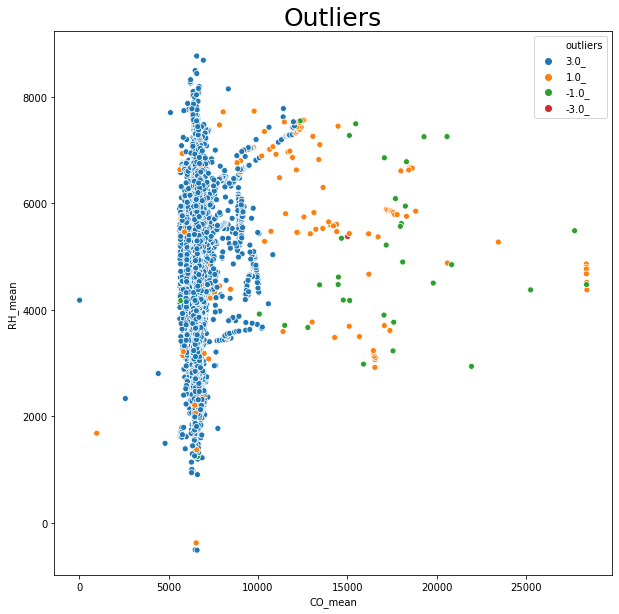

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=Test_num1.iloc[:,0], y=Test_num1.iloc[:,1],
                hue=Test_num1.outliers.astype(str) +'_')
ax.set_title('Outliers', size=25)

In [79]:
Test_num = Test_num1[(Test_num1["outliers"]==3)]
Test_num.drop(['outliers'], axis = 1, inplace = True)

In [94]:
Test_num.shape

(10902, 232)

In [93]:
Test = Test_num.merge(Test_cat, how ='inner',left_index=True, right_index=True)
Test.shape

(10902, 233)

In [95]:

Test_num = Test.drop(['y'],axis=1)
# # master_num = master.drop(['y'],axis=1)
Test_cat = Test['y']

In [29]:
xTr_Train, xTr_Test, yTr_Train, yTr_Test = train_test_split(Train_num, Train_cat, test_size = 0.2, random_state = 0)

In [31]:
# standardizing
scaler = StandardScaler()
xTr_Train=scaler.fit_transform(xTr_Train)
xTr_Test=scaler.transform(xTr_Test)


In [32]:
# defining the Hyper parameters in a parameter grid to use them in the function for classification

from sklearn.model_selection import ParameterGrid


GB_grid_param = {'n_estimators':[100,500],'learning_rate': [0.1,0.01,0.001],'subsample':[0.6,0.8,1],
                     'min_samples_split':[5], 'min_samples_leaf':[5],'random_state':[17]}

GB_grid = ParameterGrid(GB_grid_param)


GB_grid[3]

{'subsample': 0.6,
 'random_state': 17,
 'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'learning_rate': 0.1}

In [33]:
# Function to find the accuracy for all parameter grid of the ML classification algorithms

from sklearn.metrics import f1_score

def model(mla,gd,x,y,xt,yt):
    grid = []
    Accu = []
    F1 = []
    for i in range(0,len(gd)):
        alg = mla(**gd[i])
        alg.fit(x,y)
        y_pred = alg.predict(xt)
        accu = round(accuracy_score(y_pred, yt)*100)
        score = f1_score(y_pred, yt, average='weighted')
        Accu.append(accu)
        F1.append(score)
        grid.append(gd[i])
        i=i+1 
    Df1 = pd.DataFrame(grid)
    Df1["F1 Score"] = F1
    Df1["Accuracy"] = Accu
    return Df1
    

In [44]:
print(model(GradientBoostingClassifier,GB_grid,xTr_Train,yTr_Train,xTr_Test,yTr_Test))

    subsample  random_state  n_estimators  min_samples_split  \
0         0.6            17           100                  5   
1         0.8            17           100                  5   
2         1.0            17           100                  5   
3         0.6            17           500                  5   
4         0.8            17           500                  5   
5         1.0            17           500                  5   
6         0.6            17           100                  5   
7         0.8            17           100                  5   
8         1.0            17           100                  5   
9         0.6            17           500                  5   
10        0.8            17           500                  5   
11        1.0            17           500                  5   
12        0.6            17           100                  5   
13        0.8            17           100                  5   
14        1.0            17           10

In [34]:
# Function to find the accuracy for all parameter grid of the ML classification algorithms

clf = GradientBoostingClassifier(**GB_grid[3])
Grad_model =clf.fit(xTr_Train,yTr_Train)
y_pred = Grad_model.predict(xTr_Test)
accu = accuracy_score(y_pred,yTr_Test)
f1_score = f1_score(y_pred, yTr_Test, average='weighted')
print(classification_report(yTr_Test,y_pred))
display(pd.crosstab(yTr_Test, y_pred, rownames=['Actual'], colnames=['Predicted']))


               precision    recall  f1-score   support

clear_smoking       0.96      0.98      0.97       547
    dismissed       0.98      0.96      0.97       569

     accuracy                           0.97      1116
    macro avg       0.97      0.97      0.97      1116
 weighted avg       0.97      0.97      0.97      1116



Predicted,clear_smoking,dismissed
Actual,,
clear_smoking,534,13
dismissed,23,546


In [39]:
# Save the trained model as a pickle string. 

pickle.dump(Grad_model, open('GB_Saved_model.pkl','wb')) #write binary

In [96]:
# Load the pickled model 
GB_from_pickle = pickle.load(open("GB_Saved_model.pkl",'rb')) 
  
# Use the loaded pickled model to make predictions 
y_pred = GB_from_pickle.predict(Test_num)
accu = accuracy_score(y_pred,Test_cat)
print(classification_report(Test_cat,y_pred))
display(pd.crosstab(Test_cat, y_pred, rownames=['Actual'], colnames=['Predicted']))
print(accu)

               precision    recall  f1-score   support

clear_smoking       0.00      0.00      0.00      1053
    dismissed       0.90      1.00      0.95      9849

     accuracy                           0.90     10902
    macro avg       0.45      0.50      0.47     10902
 weighted avg       0.82      0.90      0.86     10902



Predicted,dismissed
Actual,
clear_smoking,1053
dismissed,9849


0.903412217941662
